<center> <h1> DS 3000 </h1> </center>
<center> <h1> Homework Assignment 3</h1> </center>

<center> <h3> Benjamin Kosiborod </h3></center>

### What to do

* Carefully read the description.
* As you write your code for each question, please include comments. 
* Make sure you execute your code for each question and compare the output to the sample output provided.
* Refrain from using advanced Python capabilities/libraries that were not covered in class.
* When in doubt, ASK! Post a question on the Blackboard discussion forum for this homework assignment.
* Complete the assignment on your own
* **Properly format your Jupyter Notebook file and remove any extra lines/code snippets/etc.**
    * The easier you make it for graders to find your answers, the better!

### What to submit
* When you are done with the assignment, save it.
* Download it as a Jupyter Notebook (DS3000_HW3.ipynb)
* Upload your downloaded Notebook to Google Colab (https://colab.research.google.com/notebooks/)
* Get a shareable link to your Notebook on Colab
    * Go to Share near the top-right corner of the screen.
    * **Make sure you select Anyone with the Link Can View**
    * Copy the link
* Go to Blackboard
* **Upload your Jupyter Notebook through the Blackboard assignment link.**
* **Paste the link to you Colab Notebook in the Add Comments field.**
* You can submit multiple attempts before the deadline. The last attempt will be graded after the deadline.

<center><h2> Part 1 </h2></center>

In this HW assignment, you will analyze a dataset regarding the number of international students studying at 500 US universities. The attached "students.csv" contains the name of the university and the number of international students enrolled in each university in 2017. 

The dataset comes from the US Department of Education's website.

In [2]:
import pandas as pd

### Question 1 (1pt)
Write a one-line code snippet that imports the "students.csv" file into a dataframe, named "students", and sets the **School** column as the index of the DataFrame.

In [3]:
students = pd.read_csv("students.csv", index_col="School")

In [4]:
students.head()

,Students
School,
Academy of Art University,6404
Adelphi University,950
American College of Commerce & Technology,1677
American Language Communication Center,2607
American Language Institute,2557


### Question 2 (1pts)
Write a one-line code snippet that returns the total number of international students across all the universities in the dataset in 2017. Your code snippet should return a single number as an int.

In [5]:
students["Students"].apply("sum")

1260512

### Question 3 (2pts)
Write a one-line code snippet that returns the number of international students at "Northeastern University" in 2017.

In [6]:
students["Students"][students.index == "Northeastern University"].iloc[0]

17304

### Question 4 (2pts)
Write a one-line code snippet that returns the name of the university with the greatest number of international students. The name of the university should be returned as a string. Avoid hardcoding to the output below. **Use Boolean indexing.**

In [7]:
students[students["Students"] == students["Students"].apply("max")].iloc[0, 0]

22238

### Question 5 (3pts)
Write a code snippet that returns the list of universities where the number of international students is greater than the number of international students at Northeastern University. Your code should return a dataframe containing the list of universities along with their student numbers. **The list should be presented in descending order based on the number of students.**

In [8]:
northeastern_students = students["Students"][students.index == "Northeastern University"].iloc[0]
students[students["Students"] > northeastern_students].sort_values(by = "Students", ascending=False)

,Students
School,
New York University,22238
University of Southern California,18786
Columbia University in the City of New York,18332


<center><h2> Part 2 </h2></center>

In this part, you will build on the previous part and answer some additional questions about the international students at top US universities. The attached "universities.csv" file contains more information about the top 10 universities with the largest international student populations. 

The dataset contains the name of the university and city and state information for the university, as well as the overall student population (total number of students, including both domestic and international students).

### Question 6 (1pt)
Write a one-line code snippet that imports the "universities.csv" file into a dataframe, named "universities".

In [9]:
universities = pd.read_csv("universities.csv", index_col="University")

In [10]:
universities

,City,State,Population
University,,,
New York University,New York City,new york,51123
University of Southern California,Los Angeles,California,44000
Columbia University in the City of New York,New York City,New York,32429
Northeastern University,Boston,Massachusetts,27260
University of Illinois,Champaign,Illinois,44087
Arizona State University,Tempe,ARIZONA,71946
Purdue University,West Lafayette,Indiana,41573
The Pennsylvania State University,Centre County,Pennsylvania,98783
University of California at Berkeley,Berkeley,california,41910


### Question 7 (3pts)
Write a one-line code snippet that combines the universities dataframe you just defined and students dataframe you used in Part 1 into a new dataframe, combined. The new dataframe should include all columns from both datasets for only the universities found in both, as shown in the sample output below.
* In this dataframe, Population refers to the total number of students (both domestic and international), whereas Students refers to the number of international students only.

In [11]:
combined = students.join(universities, how="inner")

In [12]:
combined

,Students,City,State,Population
Arizona State University,14647,Tempe,ARIZONA,71946
Boston University,11955,Boston,Massachusetts,32551
Columbia University in the City of New York,18332,New York City,New York,32429
New York University,22238,New York City,new york,51123
Northeastern University,17304,Boston,Massachusetts,27260
Purdue University,13609,West Lafayette,Indiana,41573
The Pennsylvania State University,12876,Centre County,Pennsylvania,98783
University of California at Berkeley,12779,Berkeley,california,41910
University of Illinois,14735,Champaign,Illinois,44087
University of Southern California,18786,Los Angeles,California,44000


### Question 8 (4pts)
Examine the State column in the dataframe above. You will see that some state names are all capitalized while others are typed in all lowercase letters. And we want to fix that. :)

* Write a code snippet that defines a function to converts all state names to title case (so that each initial is capitalized) and then uses this function to transform the State column in the dataframe. 
* You should use one of the data transformation methods we covered in class.

In [13]:
combined["State"] = combined["State"].apply(lambda x: x.title())

In [14]:
combined

,Students,City,State,Population
Arizona State University,14647,Tempe,Arizona,71946
Boston University,11955,Boston,Massachusetts,32551
Columbia University in the City of New York,18332,New York City,New York,32429
New York University,22238,New York City,New York,51123
Northeastern University,17304,Boston,Massachusetts,27260
Purdue University,13609,West Lafayette,Indiana,41573
The Pennsylvania State University,12876,Centre County,Pennsylvania,98783
University of California at Berkeley,12779,Berkeley,California,41910
University of Illinois,14735,Champaign,Illinois,44087
University of Southern California,18786,Los Angeles,California,44000


### Question 9 (2pts)
Write a one-line code snippet that computes a new Percentage column for the percentage of international students compared to the overall student population at the universities found in the previous dataframe.

In [15]:
combined["% International"] = combined["Students"]/combined["Population"] * 100

In [16]:
combined

,Students,City,State,Population,% International
Arizona State University,14647,Tempe,Arizona,71946,20.358324
Boston University,11955,Boston,Massachusetts,32551,36.726982
Columbia University in the City of New York,18332,New York City,New York,32429,56.529649
New York University,22238,New York City,New York,51123,43.499012
Northeastern University,17304,Boston,Massachusetts,27260,63.477623
Purdue University,13609,West Lafayette,Indiana,41573,32.735189
The Pennsylvania State University,12876,Centre County,Pennsylvania,98783,13.034631
University of California at Berkeley,12779,Berkeley,California,41910,30.491529
University of Illinois,14735,Champaign,Illinois,44087,33.422551
University of Southern California,18786,Los Angeles,California,44000,42.695455


### Question 10 (6pts)
Write a code snippet that groups the universities in the combined dataframe by State. Your code should display a summary dataframe containing 
    * the number of universities from each state, 
    * the average number of international students in each state, and 
    * the density of the international students at universities from each state.

Student density will be computed based on the Percentage column:
    * If the average value of the Percentage column for the universities in each state is greater than 50, the density should be "High".
    * If the average is greater than 30, then the density should be "Moderate"
    * If the average is less than 30, the density should be "Low"
    
**Please study the sample output below very carefully.** You will need to change the names of the columns to match the output below.

In [66]:
def density(percent):
    if percent.mean() > 50:
        return "High"
    elif percent.mean() > 30:
        return "Moderate"
    else:
        return "Low"
grouped_by_state = combined.groupby("State").agg({"State": "count", "% International": density,"Students": "mean"})
grouped_by_state.columns=["# of Universities", "Intl Student Density", "Ave # of Intl Students"]

In [67]:
grouped_by_state

,# of Universities,Intl Student Density,Ave # of Intl Students
State,,,
Arizona,1,Low,14647.0
California,2,Moderate,15782.5
Illinois,1,Moderate,14735.0
Indiana,1,Moderate,13609.0
Massachusetts,2,High,14629.5
New York,2,High,20285.0
Pennsylvania,1,Low,12876.0


## Question 11 (5pts)

Write a code snippet that produces a bar plot showing the average number of international students per state from the previous dataframe. The names of the states should be shown on the x-axis and the numbers on the y-axis, as shown below. Your graph should produce a similar output. Use any color you like.

[Text(0, 0, 'Arizona'),
 Text(0, 0, 'California'),
 Text(0, 0, 'Illinois'),
 Text(0, 0, 'Indiana'),
 Text(0, 0, 'Massachusetts'),
 Text(0, 0, 'New York'),
 Text(0, 0, 'Pennsylvania')]

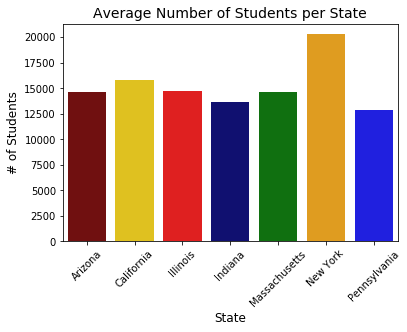

In [89]:
import seaborn as sns

# color palette loosely based off official state colors/license plate color schemes :) 
graph = sns.barplot(x=grouped_by_state.index, y="Ave # of Intl Students", data=grouped_by_state, palette=["maroon", "gold", "red", "navy", "green", "orange", "blue"])

graph.set_title("Average Number of Students per State", size = 14)

graph.set_xlabel("State", size = 12)
graph.set_ylabel("# of Students", size = 12)

graph.set_xticklabels(graph.get_xticklabels(), rotation=45)